In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load dataset
df = pd.read_csv("HIMYMdataset.csv", index_col=0)

In [3]:
# Basic Stats 
print("Average IMDB Rating:", df['IMDB_Rating'].mean())
print("Average Viewership (millions):", df['Viewers'].mean())
print("Most common director:", df['Director'].mode()[0])
print("Most common writer:", df['Writers'].mode()[0])

Average IMDB Rating: 8.155339805825243
Average Viewership (millions): 9.040634146341462
Most common director: Pamela Fryman
Most common writer: Carter Bays,Craig Thomas


In [4]:
# Season Summary
season_summary = df.groupby("Season").agg({
    "IMDB_Rating": "mean",
    "Viewers": "mean",
    "Votes": "sum"
}).reset_index()
print(season_summary)

   Season  IMDB_Rating   Viewers  Votes
0       1     8.304545  9.920476  73337
1       2     8.463636  9.071429  64920
2       3     8.321053  8.583158  54477
3       4     8.278261  9.594583  63426
4       5     8.195833  8.777083  64627
5       6     8.195833  8.583750  61223
6       7     8.166667  9.662083  63838
7       8     7.954167  8.313333  65922
8       9     7.595833  8.878333  95050


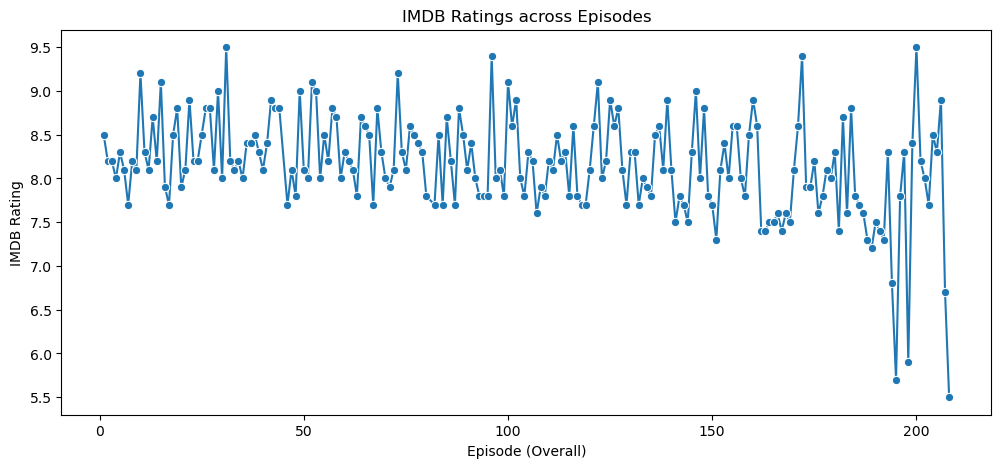

In [5]:
# Plot 1: Ratings across all episodes 
plt.figure(figsize=(12,5))
sns.lineplot(x="SNo", y="IMDB_Rating", data=df, marker="o")
plt.title("IMDB Ratings across Episodes")
plt.xlabel("Episode (Overall)")
plt.ylabel("IMDB Rating")
plt.show()

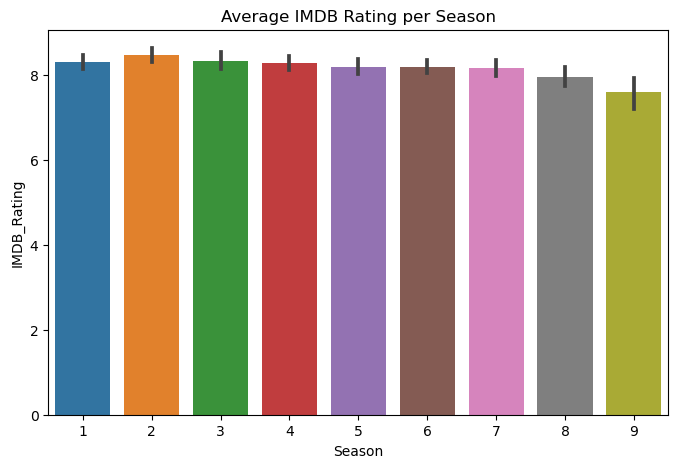

In [6]:
# Plot 2: Average rating per season 
plt.figure(figsize=(8,5))
sns.barplot(x="Season", y="IMDB_Rating", data=df, estimator="mean")
plt.title("Average IMDB Rating per Season")
plt.show()

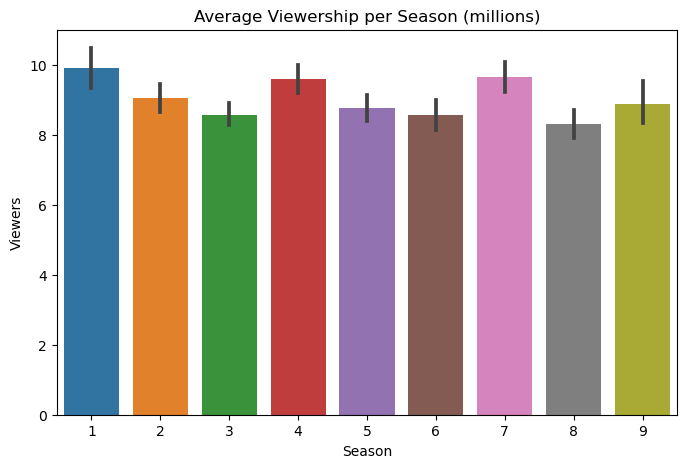

In [7]:
# Plot 3: Average viewers per season 
plt.figure(figsize=(8,5))
sns.barplot(x="Season", y="Viewers", data=df, estimator="mean")
plt.title("Average Viewership per Season (millions)")
plt.show()

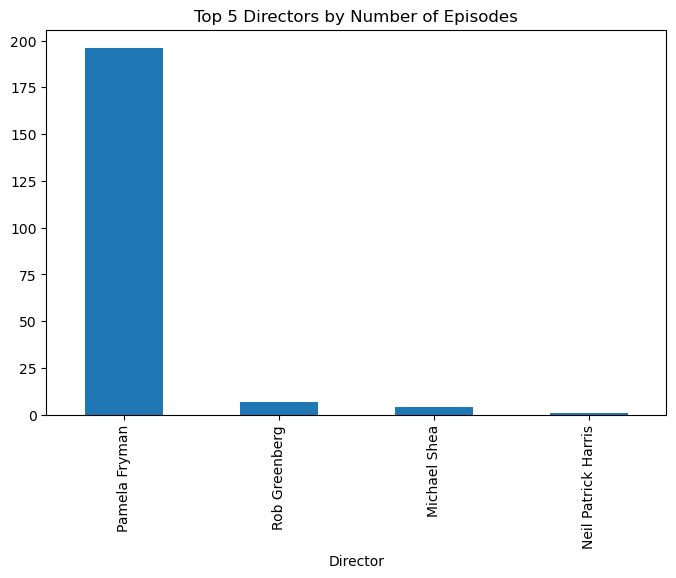

In [8]:
# Plot 4: Top Directors 
top_directors = df['Director'].value_counts().head(5)
top_directors.plot(kind='bar', figsize=(8,5))
plt.title("Top 5 Directors by Number of Episodes")
plt.show()

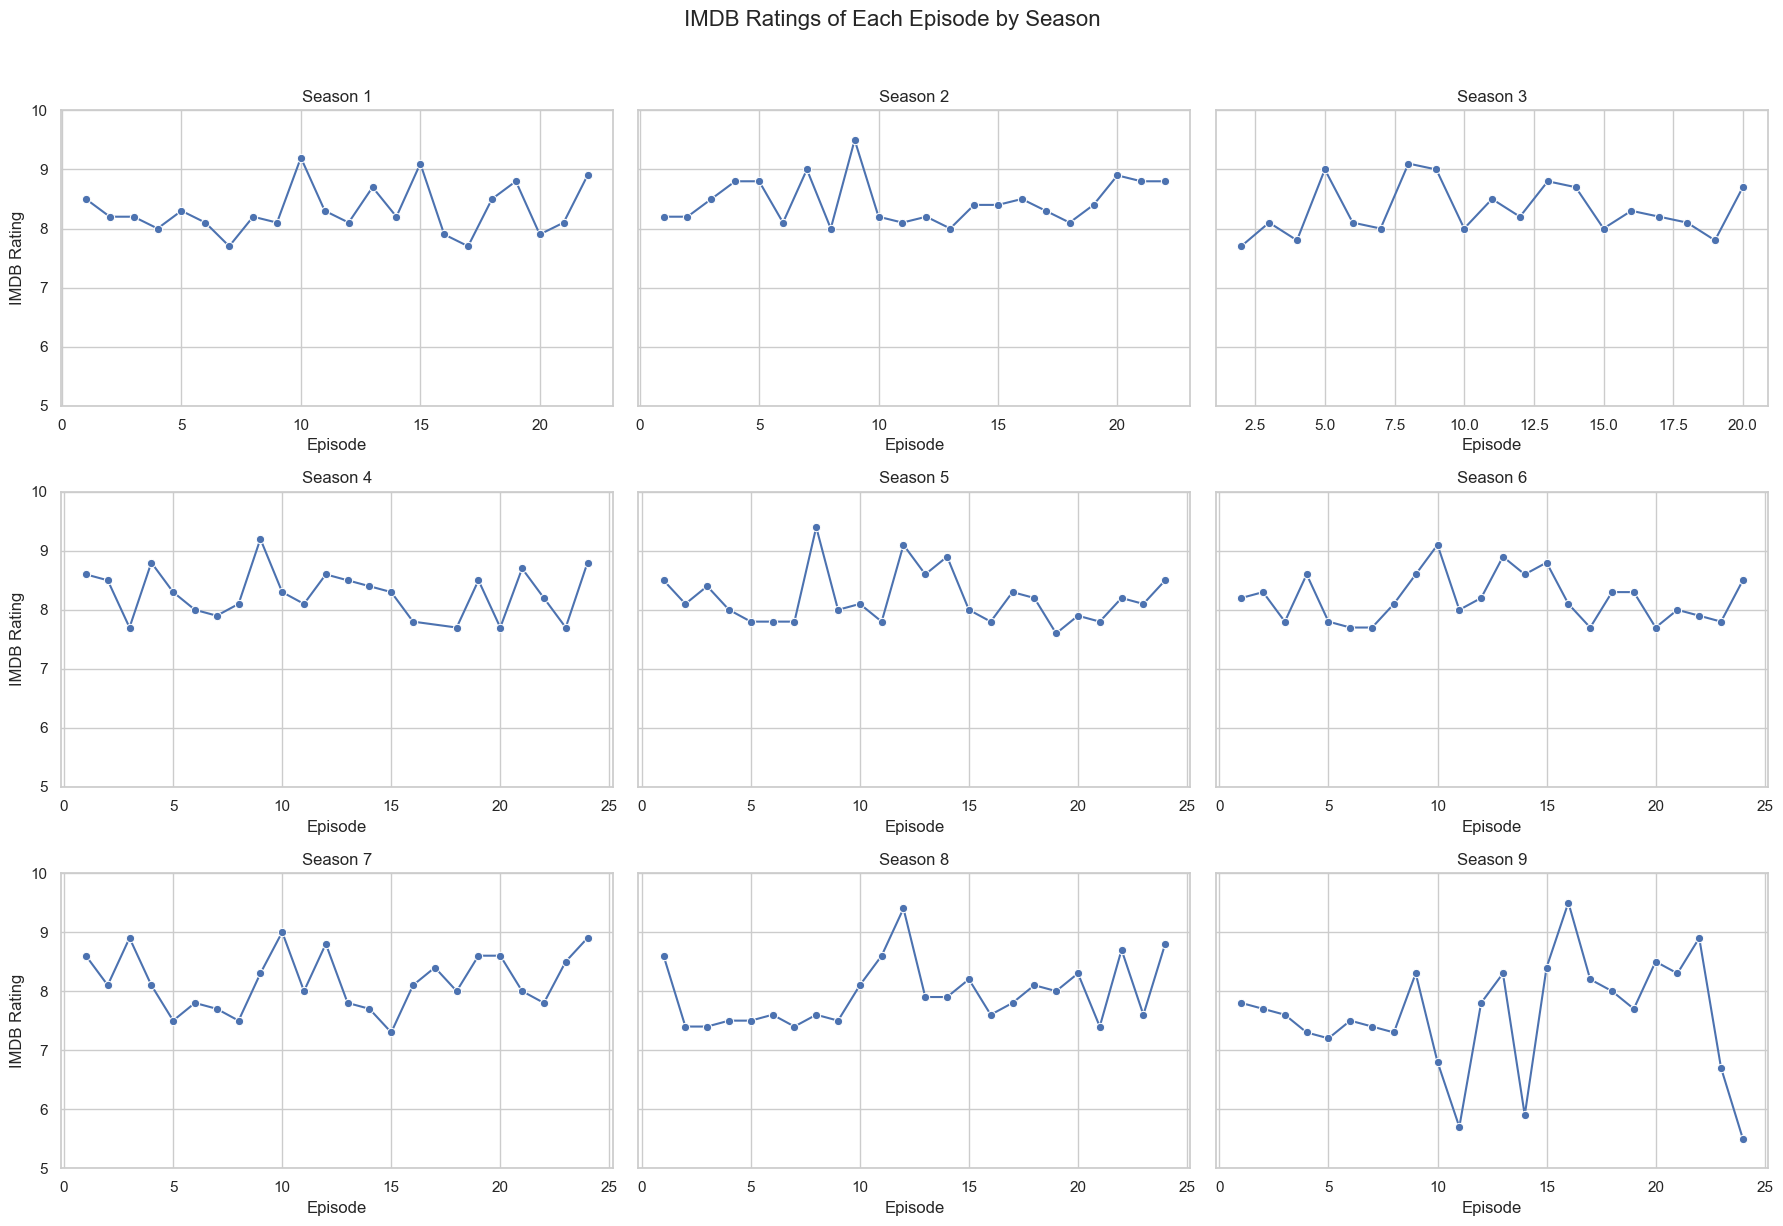

In [9]:
# Plot 5: Ratings by Season (Subplots) 
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

for season in sorted(df['Season'].unique()):
    season_data = df[df['Season'] == season]
    ax = axes[season-1]
    sns.lineplot(x="Episode", y="IMDB_Rating", data=season_data, marker="o", ax=ax)
    ax.set_title(f"Season {season}")
    ax.set_xlabel("Episode")
    ax.set_ylabel("IMDB Rating")
    ax.set_ylim(5, 10)

plt.suptitle("IMDB Ratings of Each Episode by Season", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [10]:
# Best & Worst Episodes 
best_episode = df.loc[df['IMDB_Rating'].idxmax()]
worst_episode = df.loc[df['IMDB_Rating'].idxmin()]
print("Highest Rated Episode:", best_episode['Title'], "with rating", best_episode['IMDB_Rating'])
print("Lowest Rated Episode:", worst_episode['Title'], "with rating", worst_episode['IMDB_Rating'])

Highest Rated Episode: Slap Bet with rating 9.5
Lowest Rated Episode: Last Forever, Part 2 with rating 5.5


In [11]:
# Most Watched Episode 
most_watched = df.loc[df['Viewers'].idxmax()]
print("Most Watched Episode:", most_watched['Title'], "with viewers", most_watched['Viewers'], "million")

Most Watched Episode: Last Forever, Part 1 with viewers 13.13 million


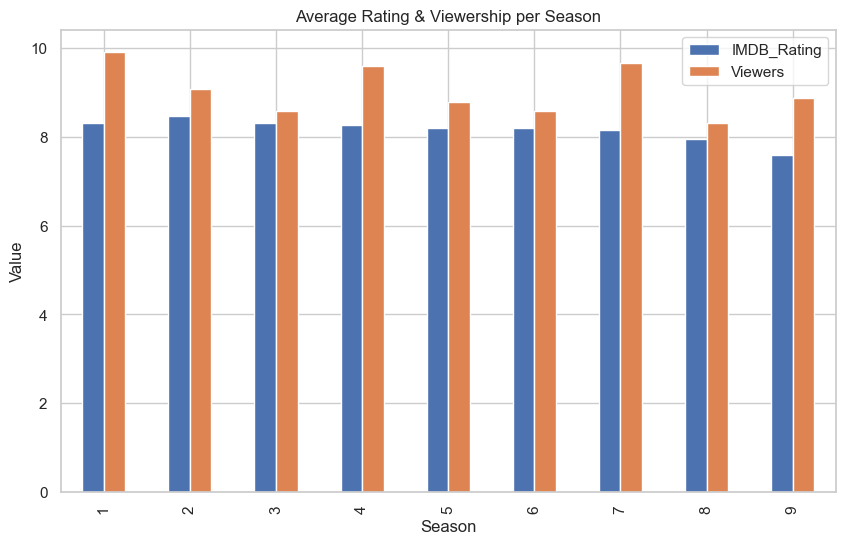

In [12]:
# Plot 6: Avg Rating & Viewership per Season 
season_avg = df.groupby("Season")[["IMDB_Rating", "Viewers"]].mean()
season_avg.plot(kind="bar", figsize=(10,6))
plt.title("Average Rating & Viewership per Season")
plt.ylabel("Value")
plt.show()

In [13]:
# Plot 7: Top Directors by Avg Rating 
top_directors = df.groupby("Director")["IMDB_Rating"].mean().sort_values(ascending=False).head(5)
print("Top 5 Directors by Avg Rating:\n", top_directors)

Top 5 Directors by Avg Rating:
 Director
Neil Patrick Harris    8.600000
Rob Greenberg          8.250000
Michael Shea           8.200000
Pamela Fryman          8.149231
Name: IMDB_Rating, dtype: float64


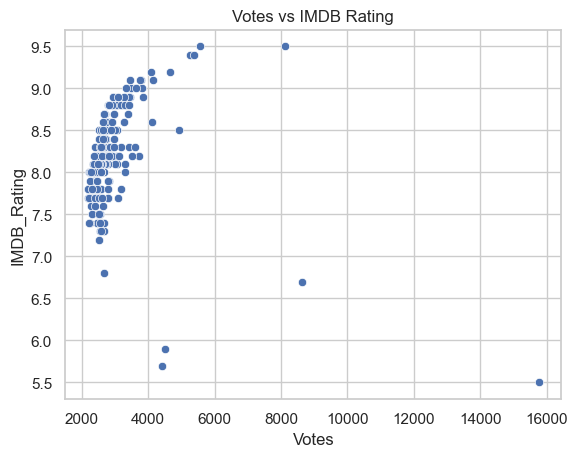

In [14]:
# Plot 8: Votes vs Rating 
sns.scatterplot(x="Votes", y="IMDB_Rating", data=df)
plt.title("Votes vs IMDB Rating")
plt.show()

C:\Users\JATIN MADAN\AppData\Local\Temp\ipykernel_74740\4046038773.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DateAired"] = pd.to_datetime(df["DateAired"], errors="coerce")


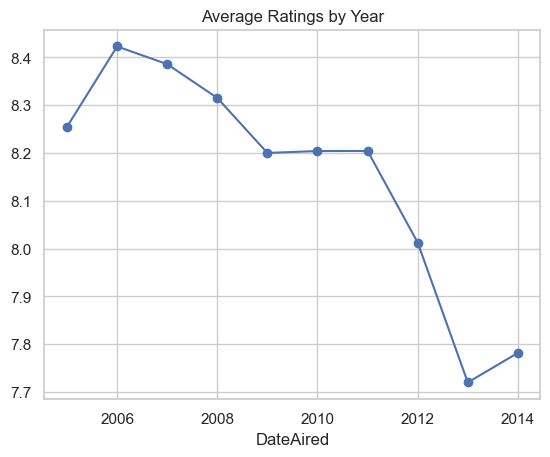

In [15]:
# Plot 9: Ratings by Year 
df["DateAired"] = pd.to_datetime(df["DateAired"], errors="coerce")
df.groupby(df["DateAired"].dt.year)["IMDB_Rating"].mean().plot(kind="line", marker="o")
plt.title("Average Ratings by Year")
plt.show()

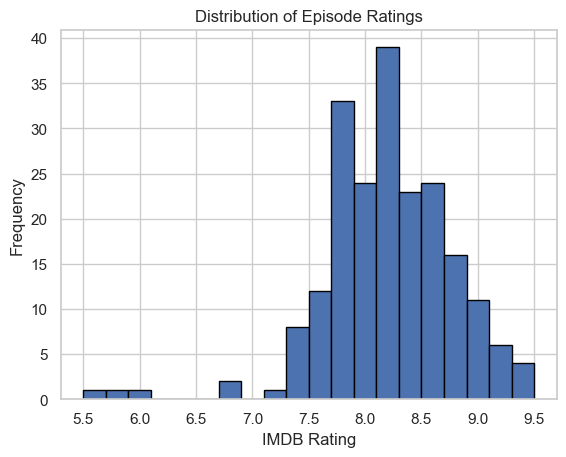

In [16]:
# Plot 10: Distribution of Ratings 
df["IMDB_Rating"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Distribution of Episode Ratings")
plt.xlabel("IMDB Rating")
plt.show()

In [17]:
# Linear Regression Model 
data = df[["Season", "Episode", "Viewers", "Votes", "IMDB_Rating"]].dropna()
X = data[["Season", "Episode", "Viewers", "Votes"]]
y = data["IMDB_Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_model = LinearRegression().fit(X_train, y_train)
print("Linear Regression R²:", lin_model.score(X_test, y_test))

Linear Regression R²: -0.18236186259718123


In [18]:
# Random Forest Model 
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest R²:", rf.score(X_test, y_test))

Random Forest R²: 0.43007147788092226
